<a href="https://colab.research.google.com/github/varunk04/computer_vision/blob/main/Food_Vision_101.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Food Vision Model:

This deep learning Model is built to clasify 101 categories of fodd data.

### Check GPU:

* Google colab provides free GPU, but not all of them are compatible with mixed precision training.

* Google provides following GPUS:
  * k80 (Not compatible)
  * p100 (Not compatible)
  * T4(Compatible)

* SO in order to make benefit of mixed precision training, we will have to use T4 GPU.

In [1]:
! nvidia-smi

Thu Jul 20 10:23:24 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   53C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## Get Helper Functions:

In [2]:
!wget https://raw.githubusercontent.com/varunk04/Helper_functions/main/helper_functions.py

--2023-07-20 10:23:25--  https://raw.githubusercontent.com/varunk04/Helper_functions/main/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-07-20 10:23:25 (114 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [3]:
# Import series of help functions:

from helper_functions import create_tensorboard_callback, plot_loss_curves,compare_historys

## Use Tensorflow Datasets to download the data.

In [4]:
import tensorflow as tf

In [5]:
# Get tensorflow datasets:

import tensorflow_datasets as tfds

In [6]:
# Lets Load in the Food101 data fom tfds:

(train_data, test_data), ds_info = tfds.load(name = 'food101',
                                             split = ['train','validation'],
                                             shuffle_files = True,
                                             as_supervised = True,
                                             with_info = True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Shuffling /root/tensorflow_datasets/food101/2.0.0.incomplete9SPDAV/food101-train.tfrecord*...:   0%|          …

Generating validation examples...:   0%|          | 0/25250 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/food101/2.0.0.incomplete9SPDAV/food101-validation.tfrecord*...:   0%|     …

Dataset food101 downloaded and prepared to /root/tensorflow_datasets/food101/2.0.0. Subsequent calls will reuse this data.


In [7]:
# Features of food 101 from TFDS:

ds_info.features

FeaturesDict({
    'image': Image(shape=(None, None, 3), dtype=uint8),
    'label': ClassLabel(shape=(), dtype=int64, num_classes=101),
})

In [8]:
# Get the class names:

class_names = ds_info.features['label'].names

class_names[:10]

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito']

## Exploring the Food 101 data from Tensorflow datsets:

To beocem one with the data we will have to get the following:
* Class names
* The shape of our inputs Data
* The datatypes of our input data
* What are lables look like?
* Do the lables match up with the class names

In [9]:
# Take one sample of train_data
train_one_sample = train_data.take(1)

In [10]:
train_one_sample

<_TakeDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [11]:
#b Output info about our training sample:

for image, label in train_one_sample:
  print(f"""
  Image shape : {image.shape}
  Image Datatype: {image.dtype}
  Target Class from Food101: {label}
  Class name :{class_names[label.numpy()]}
  """)


  Image shape : (512, 512, 3)
  Image Datatype: <dtype: 'uint8'>
  Target Class from Food101: 41
  Class name :french_onion_soup                  
  


In [12]:
# What does our image tensor look like:
image

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[168, 148, 123],
        [192, 172, 147],
        [200, 180, 155],
        ...,
        [179, 165, 139],
        [188, 172, 147],
        [154, 138, 113]],

       [[184, 164, 139],
        [209, 189, 164],
        [212, 192, 167],
        ...,
        [207, 193, 167],
        [218, 202, 177],
        [184, 168, 143]],

       [[186, 166, 139],
        [214, 194, 167],
        [211, 194, 168],
        ...,
        [207, 193, 167],
        [217, 203, 177],
        [180, 166, 140]],

       ...,

       [[206, 198, 179],
        [236, 228, 209],
        [230, 221, 204],
        ...,
        [226, 214, 200],
        [239, 227, 211],
        [203, 191, 175]],

       [[216, 208, 187],
        [239, 231, 210],
        [233, 225, 206],
        ...,
        [227, 215, 201],
        [237, 225, 209],
        [205, 193, 177]],

       [[173, 165, 144],
        [198, 190, 169],
        [204, 196, 177],
        ...,
        [197, 185, 17

## Lets plot the image:

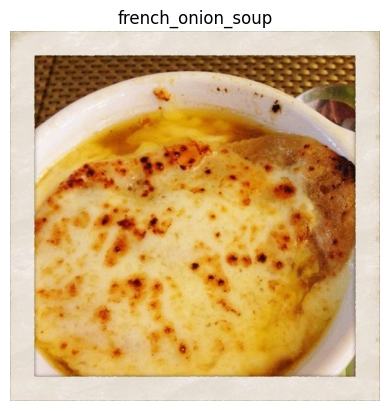

In [15]:
# Plot the image tensor:
import matplotlib.pyplot as plt
plt.imshow(image)
plt.title(class_names[label.numpy()])
plt.axis(False);

## Create Preprocessing functions for our data:

Neuarl networks perform best whern data is in ceratin way(batches, noemalized , etc)

* so in order to get it ready for a NN,
  youll often have to write preprocessing functions and map it to your data.


In [18]:
#  make a function for preprocessing images:

def preprocess_img(image, label, img_shape = 224):
  """
  Converts image datatype from `uint-8` --> `float32` and reshapes
  images to [img_shape, img_shape,colour_channels]
  """
  image = tf.image.resize(image,[img_shape, img_shape]) #reshape target image

  return tf.cast(image, tf.float32), label # return (float32_image, label) tuple


`Note:` We are not rescaling here because EfficientNetBx has prebuilt scalling functionality)

In [19]:
# Preprocess a single sample image and check the output:

preprocessed_img = preprocess_img(image, label)[0]

print(f"Image before prepeocessing : \n {image[:2]}....., \nshape: {image.shape},\nDatatype: {image.dtype}\n")
print(f"Image after prepeocessing : \n {preprocessed_img[:2]}....., \nshape: {preprocessed_img.shape},\nDatatype: {preprocessed_img.dtype}\n")


Image before prepeocessing : 
 [[[168 148 123]
  [192 172 147]
  [200 180 155]
  ...
  [179 165 139]
  [188 172 147]
  [154 138 113]]

 [[184 164 139]
  [209 189 164]
  [212 192 167]
  ...
  [207 193 167]
  [218 202 177]
  [184 168 143]]]....., 
shape: (512, 512, 3),
Datatype: <dtype: 'uint8'>

Image after prepeocessing : 
 [[[194.12755 174.12755 149.12755]
  [204.66325 184.66325 159.66325]
  [198.20918 180.42348 158.85204]
  ...
  [200.12253 186.55106 160.97958]
  [204.22949 190.22949 164.22949]
  [195.14168 179.14168 154.14168]]

 [[197.10204 177.10204 150.10204]
  [202.5102  185.5102  159.5102 ]
  [209.96428 193.83673 169.47958]
  ...
  [201.301   187.72952 162.15805]
  [207.8622  193.8622  167.8622 ]
  [197.218   183.218   157.218  ]]]....., 
shape: (224, 224, 3),
Datatype: <dtype: 'float32'>



## Batch & Prepare Datasets:

Making Data input pipeline to run really fast.

In [21]:
#Map preprocessing function to train_data (and parallelize):
train_data = train_data.map(map_func = preprocess_img, num_parallel_calls=tf.data.AUTOTUNE)

# Shuffle train data and turn it into batches:
train_data = train_data.shuffle(buffer_size = 1000).batch(batch_size = 32).prefetch(buffer_size = tf.data.AUTOTUNE)

# Map preprocessing function to test data:
test_data = test_data.map(preprocess_img, num_parallel_calls=tf.data.AUTOTUNE).batch(32).prefetch(tf.data.AUTOTUNE)

In [22]:
train_data,test_data

(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>)

## Create Modelling callbacks:

Going to create a couple of callbacks to help us while our model trains:

* Tensorboard Callback
* ModelCheckpoint Callback

In [23]:
# Create tensorboard callback from helper functions:

from helper_functions import create_tensorboard_callback

# create a model checkpoint callback to save a models progress during training:

checkpoint_path = 'model_checkpoint/cp.ckpt'
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                      monitor = 'val_acc',
                                                      save_best_only = True,
                                                      save_weights_only = True,
                                                      verbose = 0)

## Setup mixed precision training:

In [24]:
# Turn on mixed precision training:

from tensorflow.keras import mixed_precision
mixed_precision.set_global_policy('mixed_float16')

In [25]:
mixed_precision.global_policy()

<Policy "mixed_float16">

## Build feature extraction model:

In [27]:
from keras.engine.sequential import training
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

# Create base model:
input_shape = (224,224,3)
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

# Create fucntional model:
inputs = layers.Input(shape = input_shape, name = 'input_layer')

x = base_model(inputs, training = False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(len(class_names))(x)
outputs = layers.Activation('softmax', dtype = tf.float32, name = 'softmax_float32')(x)

model = tf.keras.Model(inputs, outputs)

#Compiling the model:

model.compile(loss= 'sparse_categorical_crossentropy',
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ['accuracy'])

In [29]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling2d_1   (None, 1280)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_1 (Dense)             (None, 101)               129381    
                                                                 
 softmax_float32 (Activation  (None, 101)              0         
 )                                                               
                                                                 
Total params: 4,178,952
Trainable params: 129,381
Non-train

## Checking layer dype policies:

In [30]:
# Check the dtype_policy attributes of layers in our model:

for layer in model.layers:
  print(layer.name, layer.trainable, layer.dtype,layer.dtype_policy)

input_layer True float32 <Policy "float32">
efficientnetb0 False float32 <Policy "mixed_float16">
global_average_pooling2d_1 True float32 <Policy "mixed_float16">
dense_1 True float32 <Policy "mixed_float16">
softmax_float32 True float32 <Policy "float32">


In [34]:
for layer in model.layers[1].layers:
  print(layer.name, layer.trainable, layer.dtype, layer.dtype_policy)

input_2 False float32 <Policy "float32">
rescaling_2 False float32 <Policy "mixed_float16">
normalization_1 False float32 <Policy "mixed_float16">
rescaling_3 False float32 <Policy "mixed_float16">
stem_conv_pad False float32 <Policy "mixed_float16">
stem_conv False float32 <Policy "mixed_float16">
stem_bn False float32 <Policy "mixed_float16">
stem_activation False float32 <Policy "mixed_float16">
block1a_dwconv False float32 <Policy "mixed_float16">
block1a_bn False float32 <Policy "mixed_float16">
block1a_activation False float32 <Policy "mixed_float16">
block1a_se_squeeze False float32 <Policy "mixed_float16">
block1a_se_reshape False float32 <Policy "mixed_float16">
block1a_se_reduce False float32 <Policy "mixed_float16">
block1a_se_expand False float32 <Policy "mixed_float16">
block1a_se_excite False float32 <Policy "mixed_float16">
block1a_project_conv False float32 <Policy "mixed_float16">
block1a_project_bn False float32 <Policy "mixed_float16">
block2a_expand_conv False float

## Fit the feature extraction model:

In [35]:
# Fit feature extraction model with callback:

history_101_food_classes_feature_extraction = model.fit(train_data,
                                                        epochs = 3,
                                                        steps_per_epoch = len(train_data),
                                                        validation_data = test_data,
                                                        validation_steps = int(0.15*len(test_data)),
                                                        callbacks= [create_tensorboard_callback(dir_name = 'training_logs',
                                                                                                experiment_name = 'EfficientNetb0_101'),
                                                                    model_checkpoint])

Saving TensorBoard log files to: training_logs/EfficientNetb0_101/20230720-130652
Epoch 1/3
2368/2368 [==============================] - ETA: 0s - loss: 1.7186 - accuracy: 0.5820

2368/2368 [==============================] - 205s 79ms/step - loss: 1.7186 - accuracy: 0.5820 - val_loss: 1.1241 - val_accuracy: 0.6976
Epoch 2/3
2367/2368 [============================>.] - ETA: 0s - loss: 1.1989 - accuracy: 0.6883

2368/2368 [==============================] - 191s 79ms/step - loss: 1.1988 - accuracy: 0.6883 - val_loss: 1.0207 - val_accuracy: 0.7158
Epoch 3/3
2368/2368 [==============================] - ETA: 0s - loss: 1.0543 - accuracy: 0.7226

2368/2368 [==============================] - 192s 79ms/step - loss: 1.0543 - accuracy: 0.7226 - val_loss: 0.9978 - val_accuracy: 0.7278


In [36]:
results_feature_extract_model = model.evaluate(test_data)
results_feature_extract_model

790/790 [==============================] - 57s 72ms/step - loss: 1.0023 - accuracy: 0.7270


[1.002310037612915, 0.7270098924636841]

In [37]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling2d_1   (None, 1280)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_1 (Dense)             (None, 101)               129381    
                                                                 
 softmax_float32 (Activation  (None, 101)              0         
 )                                                               
                                                                 
Total params: 4,178,952
Trainable params: 129,381
Non-train

## Saving the model: